Kaggle link to download data.csv: www.kaggle.com/datasets/zmerli/tunisia-water-reserve-2014-2023

If you have any questions or requests email me: zmerlimelek@gmail.com

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
from dateutil.parser import parse 
import matplotlib.animation as animation
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
# Formatting data
df = pd.read_csv("data.csv",delimiter=";")
df["total_water_level"] = df["total_water_level"].str.replace(",","")
df = df.astype({'total_water_level':'float'})
df = df[df['total_water_level'] != -1]
df = df.astype({'total_water_level':'float'})
df['year'] = [parse(d).year for d in df.date]
years = df['year'].unique()

In [ ]:
# This block MUST BE RUN before running any of the next blocks
# This block is used to format the figure
plt.style.use('dark_background')
d=[]
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']     
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)
ax1.axis(xmin = df.index[0], xmax = 365)

ax1.axis(ymin= (df['total_water_level'].min()-0.1),ymax=(df['total_water_level'].max()+0.2))

ax1.set_xlabel('Months')
ax1.set_ylabel('Water Reserve (M m^3)')
ax1.set_title('Tunisia\'s Water Reserve 2014-2023')

xfmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(xfmt)

ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

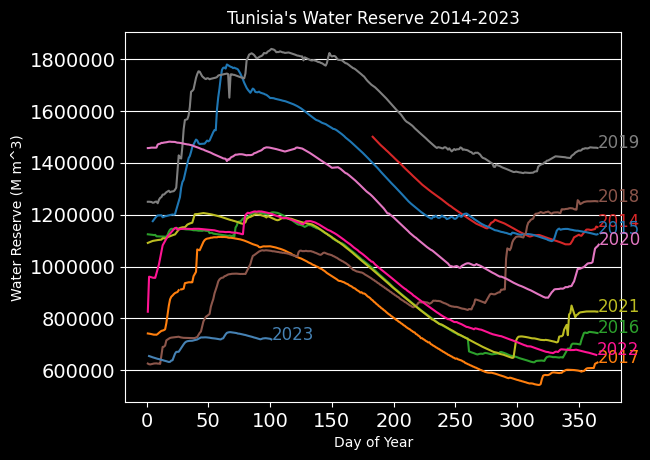

In [ ]:
# Run this block to show all data in a figure (no animation)
for i,y in enumerate(years):
    d.append(df[pd.to_datetime(df['date']).dt.year == y])
    plt.plot(pd.to_datetime(d[i]['date']).dt.day_of_year,d[i]['total_water_level'],label=y,c=mycolors[i]) 
    plt.text(pd.to_datetime(df.loc[df.year==y, 'date'][-1:].values[0]).day_of_year, df.loc[df.year==y, 'total_water_level'][-1:].values[0], y, fontsize=12,c=mycolors[i])


plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Day of Year')
plt.ylabel('Water Reserve (M m^3)')

plt.title('Tunisia\'s Water Reserve 2014-2023' )
plt.ticklabel_format(style='plain') 

plt.grid(axis='y')
plt.show()


In [ ]:
# Run this block to make all lines animated at the same time
def animate(i):
  data = []
  xp = []
  yp = []
  
  for j in range(len(d)):
    
    data.append(d[j].iloc[:int(i+1)])  #select data range

    xp.append(pd.to_datetime(data[j]['date']).dt.day_of_year)
    yp.append(data[j]['total_water_level'])
    
    ax1.plot(xp[j], yp[j],c=mycolors[j])
    if len(data[j]) == len(d[j]):
      plt.text(pd.to_datetime(data[j]['date'][-1:].values[0]).day_of_year, data[j]['total_water_level'][-1:].values[0], str(j+2014), fontsize=12,c=mycolors[j])


In [ ]:
# Run this block to recreate the timelapse seen in the video
def animate_line(i,data,xp,yp,j):
  if j < len(d):
    data.append(d[j].iloc[:int(i-sum([len(l) for l in d[:j]])+1)])  #select data range

    xp.append(pd.to_datetime(data[j]['date']).dt.day_of_year)
    yp.append(data[j]['total_water_level'])
    

    line, = ax1.plot(xp[j], yp[j],c=mycolors[j])
    
    if len(data[j]) == len(d[j]):
      plt.text(pd.to_datetime(data[j]['date'][-1:].values[0]).day_of_year, data[j]['total_water_level'][-1:].values[0], str(j+2014), fontsize=12,c=mycolors[j])
      animate_line(i,data,xp,yp,j+1)
    return line

   
def animate(i):
  data = []
  xp = []
  yp = []
  return animate_line(i,data,xp,yp,0),


In [ ]:
# This block is used to save the timelapse
# USE AT YOUR OWN RISK! Save process lasts a minimum of 2 hours for the timelapse animation
anim = animation.FuncAnimation(fig, animate, frames = len(df), interval=1, repeat=False, blit=True)
anim.save('animation.gif',fps=30,progress_callback=lambda i, n: print(str(i)+'/'+str(len(df)))) 
